In [57]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import fix_yahoo_finance as yf

In [71]:
Df = yf.download('GOOGL', '2008-01-01', '2018-07-08')

[*********************100%***********************]  1 of 1 downloaded


In [72]:
Df=Df[['Close']]

In [73]:
Df

Close
Date                   
2008-01-02   342.937927
2008-01-03   343.007996
2008-01-04   328.828827
2008-01-07   324.949951
2008-01-08   316.156158
2008-01-09   326.926941
2008-01-10   323.688690
2008-01-11   319.444458
2008-01-14   327.237244
2008-01-15   319.144135
2008-01-16   308.283295
2008-01-17   300.695709
2008-01-18   300.425415
2008-01-22   292.467468
2008-01-23   274.584595
2008-01-24   287.532532
2008-01-25   283.483490
2008-01-28   278.268280
2008-01-29   275.535522
2008-01-30   274.409424
2008-01-31   282.432434
2008-02-01   258.208221
2008-02-04   247.962967
2008-02-05   253.653656
2008-02-06   251.106110
2008-02-07   252.727722
2008-02-08   258.603607
2008-02-11   260.840851
2008-02-12   259.304291
2008-02-13   267.577576
...                 ...
2018-05-24  1085.449951
2018-05-25  1084.079956
2018-05-29  1068.069946
2018-05-30  1077.469971
2018-05-31  1100.000000
2018-06-01  1135.000000
2018-06-04  1153.040039
2018-06-05  1151.020020
2018-06-06  1146.949951
2018-06-07  1134.420044
2018-06-08  1132.709961
2018-06-11  1140.900024
2018-06-12  1148.189941
2018-06-13  1144.229980
2018-06-14  1160.109985
2018-06-15  1159.270020
2018-06-18  1183.579956
2018-06-19  1178.689941
2018-06-20  1184.069946
2018-06-21  1169.439941
2018-06-22  1169.290039
2018-06-25  1139.280029
2018-06-26  1132.619995
2018-06-27  1116.939941
2018-06-28  1126.780029
2018-06-29  1129.189941
2018-07-02  1142.109985
2018-07-03  1116.280029
2018-07-05  1141.290039
2018-07-06  1155.079956

[2647 rows x 1 columns]

In [74]:
Df= Df.dropna()

In [75]:
Df.Close.plot(figsize=(15,10))

In [77]:
plt.title('Google')
plt.ylabel('Price')

Text(0,0.5,'Price')

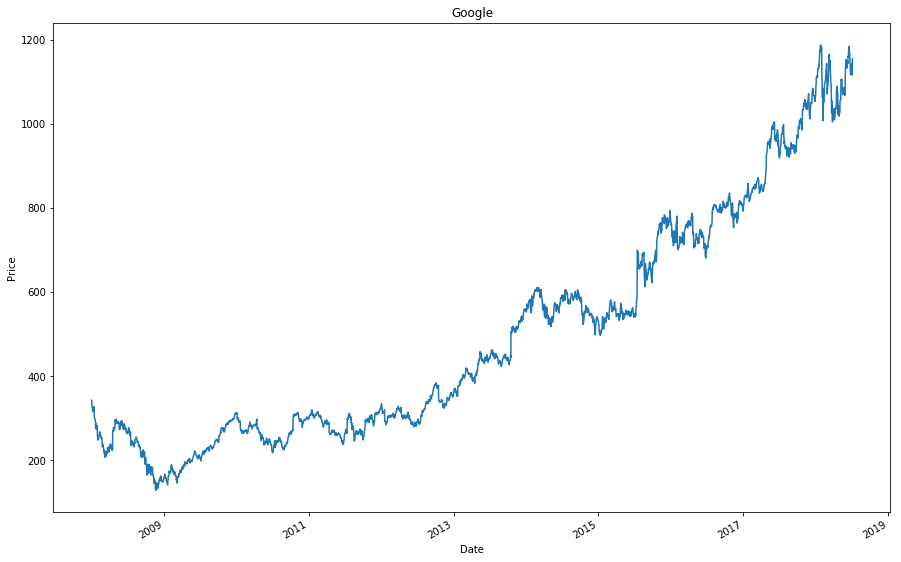

In [78]:
plt.show()

In [79]:
Df['SMA_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['SMA_9'] = Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['SMA_3','SMA_9']]
X.head()

SMA_3       SMA_9
Date                              
2008-01-15  323.456797  328.130910
2008-01-16  321.941946  325.487156
2008-01-17  318.221558  321.628855
2008-01-18  309.374380  318.502953
2008-01-22  303.134806  315.778005

In [80]:
y = Df['Close']
y.head()

Date
2008-01-15    319.144135
2008-01-16    308.283295
2008-01-17    300.695709
2008-01-18    300.425415
2008-01-22    292.467468
Name: Close, dtype: float64

In [81]:
t=.8
t= int(t*len(Df))
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [82]:
## Create Linear regression Model
linear = LinearRegression().fit(X_train,y_train)
print ("Price =", round(linear.coef_[0],2), \
"* 3SMA", round(linear.coef_[1],2), \
"* 9SMA +", round(linear.intercept_,2))

Price = 1.17 * 3SMA -0.17 * 9SMA + 0.19


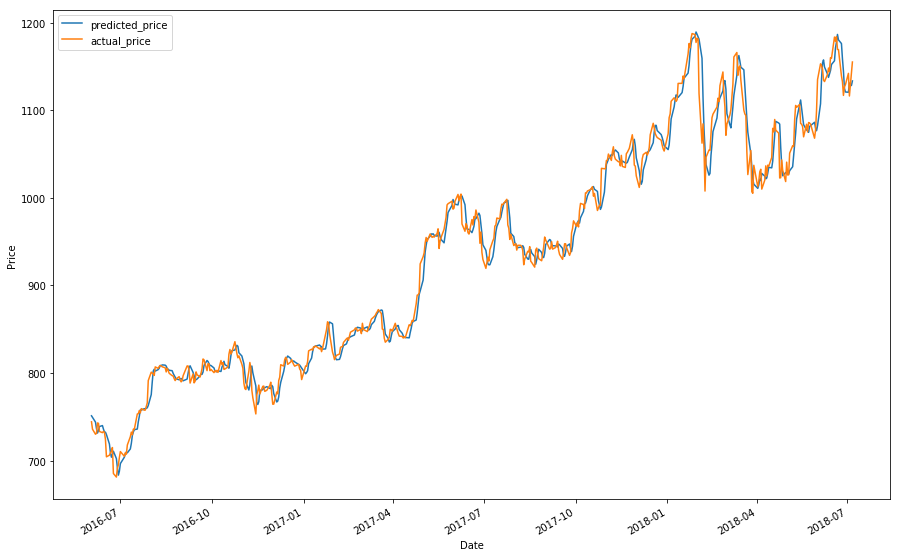

In [83]:
p_price = linear.predict(X_test)
p_price = pd.DataFrame(p_price,index=y_test.index,columns = ['price'])
p_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Price")
plt.show()
                                                             

In [84]:
r2 = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2))

98.65